In [4]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/linkedin_data_set.csv",engine='python',encoding='utf-8')

In [6]:
df.head(5)

,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,...,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,41,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500,au,NaN,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345,01-07-2014,760.5000,989.9361
1,41,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500,au,01-06-2014,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346,01-11-2013,760.5000,989.9361
2,41,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500,au,01-12-2012,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348,01-08-2008,760.5000,747.2308
3,41,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500,au,01-07-2008,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350,01-02-2007,760.5000,989.9361
4,30,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500,au,NaN,...,"urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893,01-01-2017,395.2857,683.3496


In [7]:
df.columns

Index(['ageEstimate', 'companyFollowerCount', 'companyHasLogo', 'companyName',
       'companyStaffCount', 'companyUrl', 'companyUrn', 'connectionsCount',
       'country', 'endDate', 'followable', 'followersCount', 'genderEstimate',
       'hasPicture', 'isPremium', 'mbrLocation', 'mbrLocationCode', 'mbrTitle',
       'memberUrn', 'posLocation', 'posLocationCode', 'posTitle', 'positionId',
       'startDate', 'avgMemberPosDuration', 'avgCompanyPosDuration'],
      dtype='object')

In [8]:
df.isnull().sum()

ageEstimate                  0
companyFollowerCount      1466
companyHasLogo            3130
companyName                  2
companyStaffCount         1136
companyUrl                2088
companyUrn                   0
connectionsCount             0
country                      0
endDate                   8911
followable                   0
followersCount               0
genderEstimate            3970
hasPicture                9936
isPremium                    0
mbrLocation                  0
mbrLocationCode            148
mbrTitle                     0
memberUrn                    0
posLocation              11126
posLocationCode          22570
posTitle                     0
positionId                   0
startDate                   16
avgMemberPosDuration       225
avgCompanyPosDuration      851
dtype: int64

In [9]:
df.shape

(39537, 26)

In [10]:
companyName = df['companyName'].dropna()

In [11]:
companyName=companyName.tolist() 

In [12]:
print(len(companyName))

39535


In [16]:
def findJobCntoncompanyName(companyName):
    requiredSkill = []
    for i in companyName:
        if(companyName in i):
            companyName.append(i)
    return(len(companyName)) 

In [17]:
findJobCntoncompanyName("Commonwealth Bank")

17

In [18]:
top5companyName = df['companyName'].value_counts()
top5companyName[0:5]

Telstra                    683
National Australia Bank    484
Commonwealth Bank          433
IBM                        327
ANZ                        253
Name: companyName, dtype: int64

In [19]:
top10mbrTitle = df['mbrTitle'].value_counts()
top10mbrTitle[0:10]

National Coordinator - Website and Learning Management Systems at Positive Partnerships                        69
Project Manager                                                                                                49
Consultant                                                                                                     43
Managing Partner | MBA                                                                                         42
Senior Project Manager                                                                                         41
at                                                                                                             38
Freelance journalist and editor                                                                                37
Business (Honours) Student | Business/Creative Industries Graduate | Interested in Entertainment Industries    30
Independent reviewer and executive strategist for complex infrastructure and technology 

In [20]:
top10posTitle = df['posTitle'].value_counts()
top10posTitle[0:10]

Project Manager           442
Director                  369
Consultant                294
Senior Consultant         230
Business Analyst          197
Software Engineer         184
Senior Project Manager    181
Senior Associate          168
Partner                   160
Research Assistant        148
Name: posTitle, dtype: int64

In [21]:
top10companyStaffCount = df['companyStaffCount'].value_counts()
top10companyStaffCount[0:10]

0.0        233
11.0       226
10284.0    216
10.0       213
Name: companyStaffCount, dtype: int64

In [24]:
op5companyName = df['companyName'].value_counts()
top5companyName = top5companyName[0:5]
print(type(top5companyName))

<class 'pandas.core.series.Series'>


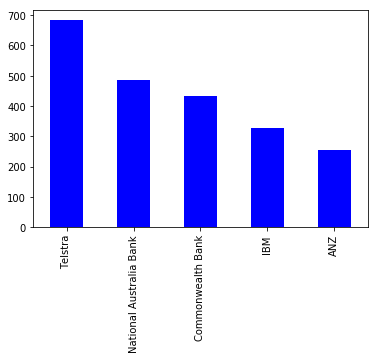

In [25]:
top5companyName.plot.bar(stacked=True, colormap='winter')

In [29]:
top5companyStaffCount = df['companyStaffCount'].value_counts()
top5companyStaffCount[0:5]

Series([], Name: companyStaffCount, dtype: int64)

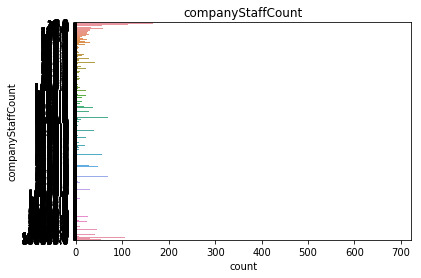

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="companyStaffCount", data=df)
plt.title("companyStaffCount")

plt.show()

In [30]:
diffposTitle= df['posTitle'].dropna()

In [31]:
diffposTitle.value_counts()

Project Manager                                                                    442
Director                                                                           369
Consultant                                                                         294
Senior Consultant                                                                  230
Business Analyst                                                                   197
Software Engineer                                                                  184
Senior Project Manager                                                             181
Senior Associate                                                                   168
Partner                                                                            160
Research Assistant                                                                 148
Project Engineer                                                                   139
Lecturer                                   

In [32]:
dfposLocation= df['posLocation'].value_counts()
dfposLocation = dfposLocation[0:10]

In [33]:
df_skill_loc = df.loc[df['posLocation'] == 'City of Australia,sydney']
df_skill_loc['posLocation'].value_counts()

Series([], Name: posLocation, dtype: int64)

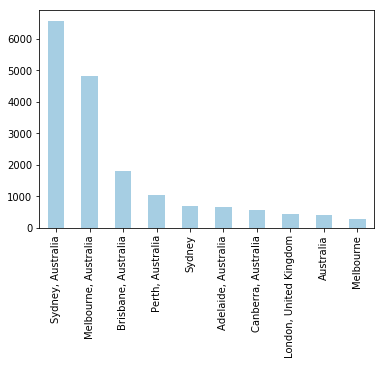

In [34]:
dfposLocation.plot.bar(stacked=True, colormap='Paired')

# Analysis of posTitle Data

In [36]:
posTitle= df['posTitle'].dropna()

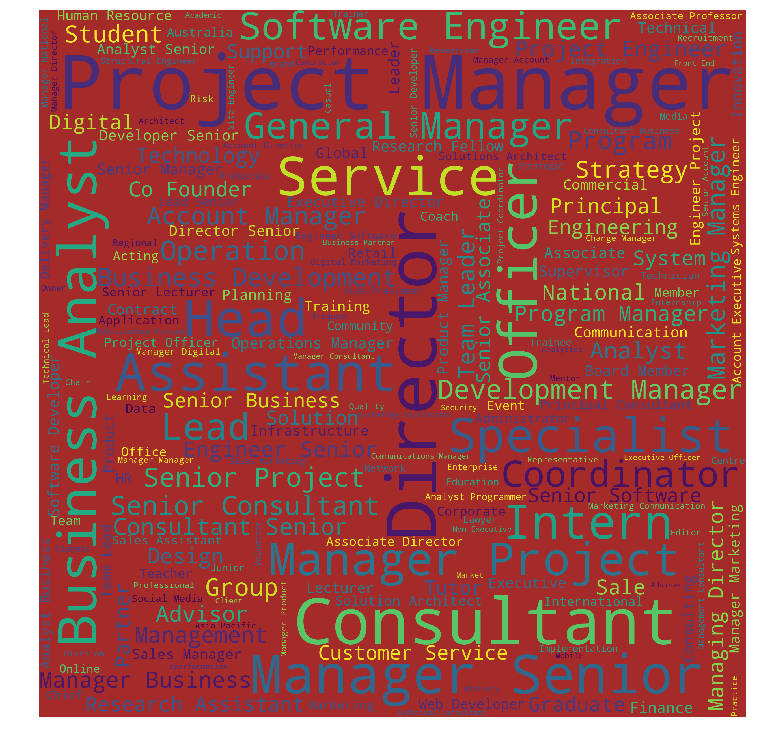

In [37]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(posTitle)

In [38]:
posTitle = posTitle.tolist()

In [39]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [40]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(posTitle))

print(data_words[:1])

[['portfolio', 'executive']]


In [41]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['portfolio', 'executive']


In [42]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [43]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['portfolio', 'executive'], ['solution', 'delivery', 'executive'], ['project', 'manager'], ['project', 'manager']]


In [44]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [45]:
id2word[0]

'executive'

In [46]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('executive', 1), ('portfolio', 1)],
 [('executive', 1), ('delivery', 1), ('solution', 1)],
 [('manager', 1), ('project', 1)]]

# Build LDA Model for posTitle Data

In [47]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [48]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.137*"analyst" + 0.134*"business" + 0.130*"consultant" + 0.129*"director" '
  '+ 0.034*"program" + 0.030*"management" + 0.026*"operation" + '
  '0.022*"coordinator" + 0.018*"test" + 0.016*"design"'),
 (1,
  '0.068*"lead" + 0.064*"officer" + 0.054*"sale" + 0.053*"system" + '
  '0.046*"account" + 0.040*"head" + 0.033*"designer" + 0.032*"group" + '
  '0.031*"support" + 0.028*"technology"'),
 (2,
  '0.107*"service" + 0.070*"specialist" + 0.043*"founder" + 0.041*"partner" + '
  '0.033*"customer" + 0.032*"communication" + 0.026*"member" + '
  '0.024*"engineering" + 0.022*"medium" + 0.021*"advisor"'),
 (3,
  '0.314*"manager" + 0.094*"project" + 0.039*"solution" + 0.027*"product" + '
  '0.026*"architect" + 0.024*"research" + 0.020*"delivery" + 0.018*"assistant" '
  '+ 0.015*"contract" + 0.015*"strategy"'),
 (4,
  '0.131*"engineer" + 0.121*"developer" + 0.087*"marketing" + '
  '0.078*"development" + 0.077*"software" + 0.038*"team" + 0.036*"web" + '
  '0.033*"leader" + 0.020*"student" +

In [49]:
# Compute Model Perplexity and Coherence Score

In [50]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.257004242956612

Coherence Score:  0.43195418660108764


In [51]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.203704 -0.331256       1        1  28.656906
0      0.380439 -0.107375       2        1  22.044117
1     -0.067721  0.140100       3        1  18.062445
4     -0.062273  0.205213       4        1  16.421730
2     -0.046741  0.093317       5        1  14.814803, topic_info=    Category         Freq            Term        Total  loglift  logprob
4    Default  8582.000000         manager  8582.000000  30.0000  30.0000
115  Default  2876.000000         analyst  2876.000000  29.0000  29.0000
7    Default  2820.000000        business  2820.000000  28.0000  28.0000
40   Default  2741.000000      consultant  2741.000000  27.0000  27.0000
45   Default  2720.000000        director  2720.000000  26.0000  26.0000
28   Default  2054.000000        engineer  2054.000000  25.0000  25.0000
81   Default  1899.000000       developer  1899.000000  24.0000  24.0000
5    Default  2572.000000         project  2572.000000  23.0000  23.0000
38   Default  1515.000000         service  1515.000000  22.0000  22.0000
6    Default  1362.000000       marketing  1362.000000  21.0000  21.0000
48   Default  1224.000000     development  1224.000000  20.0000  20.0000
64   Default  1203.000000        software  1203.000000  19.0000  19.0000
14   Default  1168.000000            lead  1168.000000  18.0000  18.0000
199  Default   993.000000      specialist   993.000000  17.0000  17.0000
90   Default  1108.000000         officer  1108.000000  16.0000  16.0000
74   Default   935.000000            sale   935.000000  15.0000  15.0000
16   Default   914.000000          system   914.000000  14.0000  14.0000
39   Default   797.000000         account   797.000000  13.0000  13.0000
3    Default  1064.000000        solution  1064.000000  12.0000  12.0000
168  Default   696.000000            head   696.000000  11.0000  11.0000
387  Default   613.000000         founder   613.000000  10.0000  10.0000
36   Default   575.000000         partner   575.000000   9.0000   9.0000
22   Default   596.000000            team   596.000000   8.0000   8.0000
149  Default   711.000000         program   711.000000   7.0000   7.0000
220  Default   559.000000             web   559.000000   6.0000   6.0000
169  Default   571.000000        designer   571.000000   5.0000   5.0000
49   Default   558.000000           group   558.000000   4.0000   4.0000
33   Default   632.000000      management   632.000000   3.0000   3.0000
9    Default   522.000000          leader   522.000000   2.0000   2.0000
200  Default   751.000000         product   751.000000   1.0000   1.0000
..       ...          ...             ...          ...      ...      ...
38    Topic5  1514.870117         service  1515.609741   1.9091  -2.2327
199   Topic5   992.963440      specialist   993.704590   1.9088  -2.6551
387   Topic5   612.835510         founder   613.574890   1.9083  -3.1377
36    Topic5   574.262756         partner   575.007690   1.9082  -3.2027
201   Topic5   465.600739        customer   466.340118   1.9080  -3.4125
17    Topic5   449.173798   communication   449.918243   1.9079  -3.4484
63    Topic5   365.231506          member   365.967407   1.9075  -3.6553
61    Topic5   332.829315     engineering   333.572266   1.9073  -3.7482
173   Topic5   312.620972          medium   313.361023   1.9072  -3.8108
113   Topic5   297.575348         advisor   298.313416   1.9071  -3.8602
59    Topic5   286.181732           board   286.918182   1.9070  -3.8992
202   Topic5   218.397690  infrastructure   219.137009   1.9062  -4.1695
183   Topic5   206.578918           owner   207.327988   1.9059  -4.2251
405   Topic5   199.049301      investment   199.815018   1.9057  -4.2623
334   Topic5   181.277817  representative   182.014221   1.9055  -4.3558
117   Topic5   172.610092             ceo   173.347717   1.9053  -4.4048
44    Topic5   154.069244      consulting   154.808578   1.9048  -4.5184
37

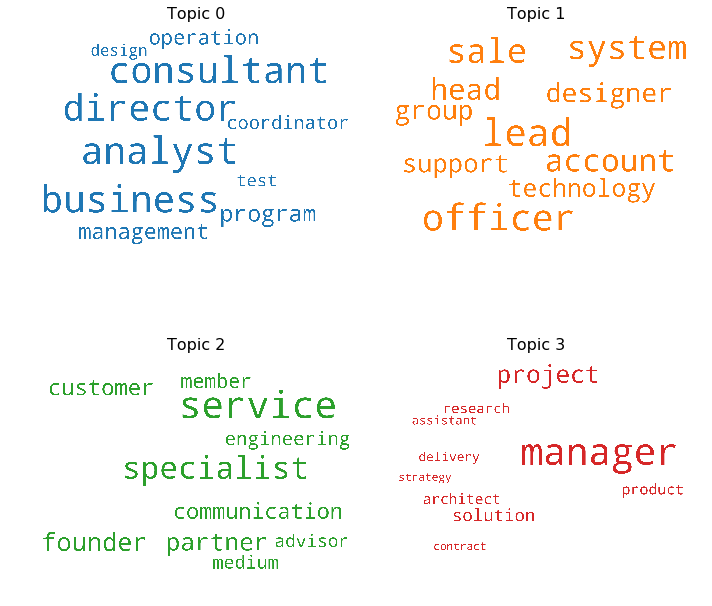

In [52]:

# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Hyperparameter Tuning - Number of Topics and Alpha

In [53]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [54]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [55]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.400843
1,0.010,6,0.436207
2,0.010,10,0.480068
3,0.010,15,0.563482
4,0.010,20,0.591906
5,0.100,2,0.344695
6,0.100,6,0.415907
7,0.100,10,0.496948
8,0.100,15,0.593944
9,0.100,20,0.616431


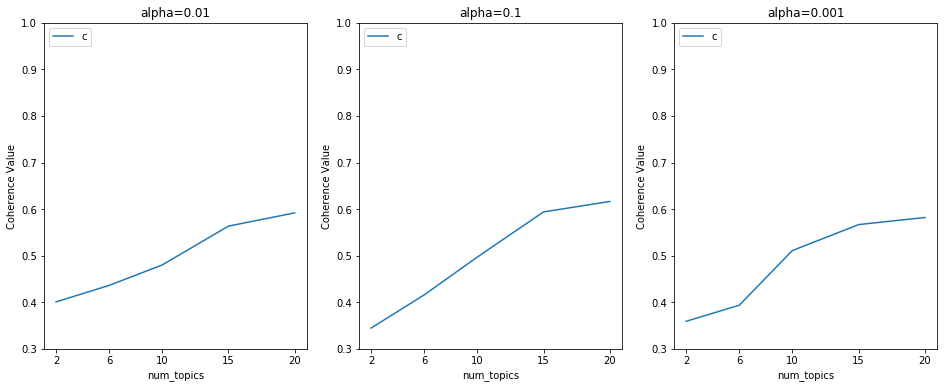

In [56]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [57]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [58]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.356*"analyst" + 0.349*"business" + 0.045*"customer" + 0.035*"datum" + '
  '0.034*"banking" + 0.028*"programmer" + 0.026*"enterprise" + '
  '0.019*"investment" + 0.018*"process" + 0.016*"improvement"'),
 (1,
  '0.297*"lead" + 0.115*"test" + 0.076*"transformation" + 0.055*"practice" + '
  '0.051*"brand" + 0.042*"work" + 0.042*"experience" + 0.040*"producer" + '
  '0.037*"apac" + 0.031*"content"'),
 (2,
  '0.332*"founder" + 0.311*"partner" + 0.093*"ceo" + 0.037*"advisory" + '
  '0.036*"cto" + 0.019*"managing" + 0.000*"founding" + 0.000*"anz" + '
  '0.000*"principle" + 0.000*"talent_acquisition"'),
 (3,
  '0.510*"manager" + 0.153*"project" + 0.063*"solution" + 0.052*"program" + '
  '0.045*"product" + 0.032*"delivery" + 0.030*"assistant" + 0.027*"executive" '
  '+ 0.018*"finance" + 0.014*"client"'),
 (4,
  '0.323*"engineer" + 0.189*"software" + 0.134*"system" + 0.117*"account" + '
  '0.057*"design" + 0.048*"student" + 0.025*"quality" + 0.016*"assurance" + '
  '0.014*"site" + 0.011

In [59]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.799391708940634

Coherence Score:  0.5156080646321265


In [60]:
coherence_model_lda.get_coherence_per_topic()

[0.4771217706374202,
 0.5429241620190884,
 0.4836092283701182,
 0.3741059569529877,
 0.5425646332987725,
 0.5581694931085704,
 0.47906728146737604,
 0.43867017148099385,
 0.37075481963706625,
 0.5917799726896782,
 0.5255273662565679,
 0.5640534173053751,
 0.5222703350793116,
 0.7341821910365586,
 0.5293201701420148]

In [61]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.326677 -0.304473       1        1  15.909523
8      0.080924  0.043422       2        1   8.007412
4      0.093505  0.055546       3        1   7.746233
0      0.184954  0.349917       4        1   7.625549
12     0.084248  0.046460       5        1   6.757610
14     0.007422  0.000179       6        1   6.717821
7     -0.080944 -0.025771       7        1   6.507222
10    -0.024979 -0.012265       8        1   6.447007
6     -0.131464 -0.032558       9        1   5.796354
9     -0.027808 -0.011448      10        1   5.558941
11     0.007121  0.000234      11        1   5.546821
5     -0.090680 -0.026540      12        1   5.473577
1     -0.056079 -0.020279      13        1   5.158091
2     -0.179889 -0.035208      14        1   3.816844
13    -0.193006 -0.027215      15        1   2.931003, topic_info=     Category         Freq               Term        Total  loglift  logprob
4     Default  7745.000000            manager  7745.000000  30.0000  30.0000
45    Default  4049.000000           director  4049.000000  29.0000  29.0000
40    Default  3538.000000         consultant  3538.000000  28.0000  28.0000
115   Default  2591.000000            analyst  2591.000000  27.0000  27.0000
7     Default  2540.000000           business  2540.000000  26.0000  26.0000
28    Default  2386.000000           engineer  2386.000000  25.0000  25.0000
81    Default  1958.000000          developer  1958.000000  24.0000  24.0000
6     Default  1927.000000          marketing  1927.000000  23.0000  23.0000
48    Default  1731.000000        development  1731.000000  22.0000  22.0000
14    Default  1463.000000               lead  1463.000000  21.0000  21.0000
74    Default  1488.000000               sale  1488.000000  20.0000  20.0000
5     Default  2322.000000            project  2322.000000  19.0000  19.0000
38    Default  1588.000000            service  1588.000000  18.0000  18.0000
387   Default  1209.000000            founder  1209.000000  17.0000  17.0000
90    Default  1464.000000            officer  1464.000000  16.0000  16.0000
36    Default  1133.000000            partner  1133.000000  15.0000  15.0000
64    Default  1398.000000           software  1398.000000  14.0000  14.0000
53    Default  1098.000000           research  1098.000000  13.0000  13.0000
33    Default  1020.000000         management  1020.000000  12.0000  12.0000
199   Default  1042.000000         specialist  1042.000000  11.0000  11.0000
79    Default   928.000000          architect   928.000000  10.0000  10.0000
16    Default   992.000000             system   992.000000   9.0000   9.0000
17    Default   852.000000      communication   852.000000   8.0000   8.0000
39    Default   865.000000            account   865.000000   7.0000   7.0000
168   Default   799.000000               head   799.000000   6.0000   6.0000
132   Default   732.000000        coordinator   732.000000   5.0000   5.0000
27    Default   748.000000          operation   748.000000   4.0000   4.0000
95    Default   664.000000                 co   664.000000   3.0000   3.0000
172   Default   614.000000          associate   614.000000   2.0000   2.0000
3     Default   961.000000           solution   961.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
148   Topic15     0.606607          treasurer     1.794171   2.4454  -8.4355
1839  Topic15     0.606605             merger     1.793954   2.4455  -8.4355
1057  Topic15     0.606683             credit     1.804314   2.4399  -8.4354
1356  Topic15     0.606637       technologist     1.797710   2.4435  -8.4355
207   Topic15     0.606629            auditor     1.796907   2.4439  -8.4355
435   Topic15     0.606673            trainer     1.803788   2.4402  -8.4354
395   Topic15     0.606637              audit     1.798458   2.4431  -8.4355
4575  Topic15     0.606725  agility_

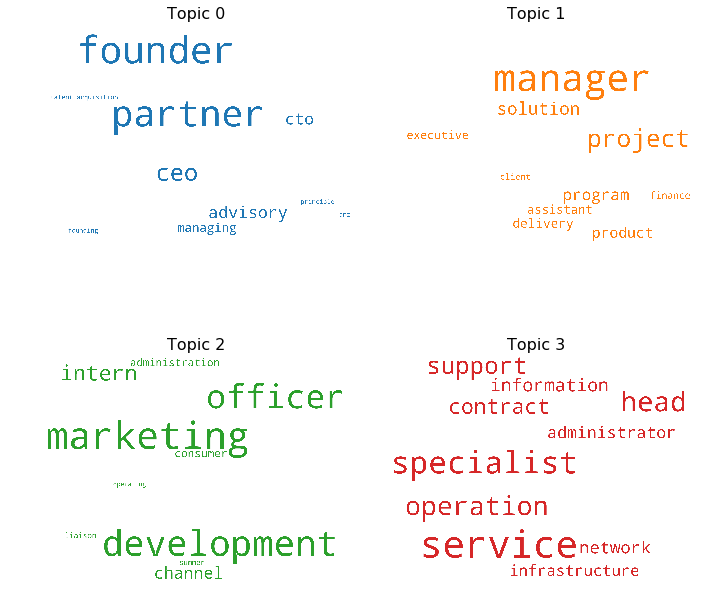

In [62]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()